## Display Proba-V Time-Series
**Description:** Display Proba-V NDVI (Normalized Difference Vegetation Index) Time-Series with help of Google Earth Engine Python API. Extracting Proba-V NDVI data from a randomly chosen point in Malawi.

In [1]:
%matplotlib inline

In [2]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=3trR6VCNTO-ptffeFfmRdURjf4igc70z0jLa_-t6sOA&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWg-tqbD5m6sknjHnPvPFa1r4BzlKDBVfhQ6G0lZk0w658G8aQO5phk

Successfully saved authorization token.


In [3]:
from IPython.display import Image
import ee, datetime
import pandas as pd
from pylab import *
from matplotlib.pylab import rcParams

ee.Initialize()

### Load Proba-V image collection and a point geometry 
Selected location of point is from the Proba-V Footprint X18Y02 in Malawi.

In [19]:
collection = ee.ImageCollection('VITO/PROBAV/C1/S1_TOC_100M').filterBounds(point).filterDate("2019-01-01","2019-12-31").sort("CLOUD_COVERAGE_ASSESSMENT",);
point = {'type':'Point', 'coordinates':[33.76750946044922,-13.997037155092583]};

In [20]:
#image=ee.Image(collection.filterDate("2019-01-01","2019-12-31").sort("CLOUD_COVERAGE_ASSESSMENT",));

### Retrieve information, reshape and calculate NDVI
Retrieving information from point geometry with a buffer of 500m over image collection. Reshaping data and calculating NDVI from **RED** and **NIR** band.

In [26]:
info = collection.getRegion(point,500).getInfo()

In [27]:
info

[['id',
  'longitude',
  'latitude',
  'time',
  'RED',
  'NIR',
  'BLUE',
  'SWIR',
  'NDVI',
  'SZA',
  'SAA',
  'SWIRVAA',
  'SWIRVZA',
  'VNIRVAA',
  'VNIRVZA',
  'SM',
  'TIME'],
 ['20190101',
  33.76542574184251,
  -13.997997914792444,
  1546300800000,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['20190102',
  33.76542574184251,
  -13.997997914792444,
  1546387200000,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  10,
  None],
 ['20190103',
  33.76542574184251,
  -13.997997914792444,
  1546473600000,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  10,
  None],
 ['20190104',
  33.76542574184251,
  -13.997997914792444,
  1546560000000,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  10,
  None],
 ['20190105',
  33.76542574184251,
  -13.997997914792444,
  1546646400000,
  None,
  None,
  None,
  N

In [22]:
# Reshape image collection 
header = info[0]
data = array(info[1:])

iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
band_list = ['RED',u'NIR']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)

# Calculate NDVI
red = yData[:,0]
nir = yData[:,1]
ndvi = (nir - red) / (nir + red)

### Reshape NDVI array into Pandas Dataframe

In [24]:
df = pd.DataFrame(data=ndvi, index=list(range(len(ndvi))), columns=['NDVI'])
df = df.interpolate()
df['Date'] = pd.Series(time, index=df.index)

### Plot NDVI Time-Series for the selected location in Luxembourg

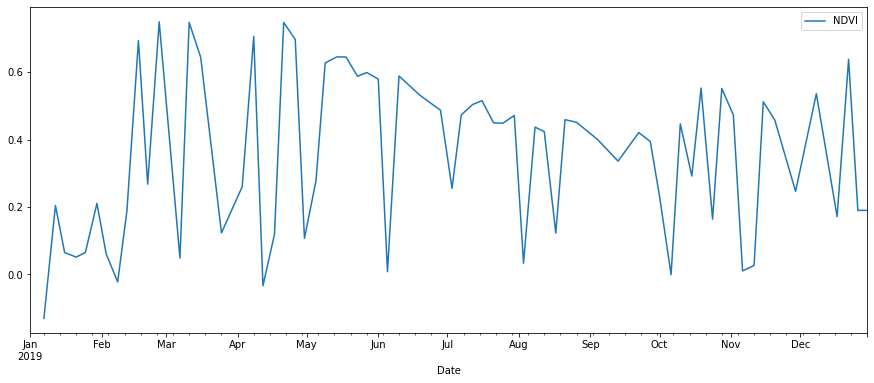

In [25]:
rcParams['figure.figsize'] = 15, 6
df.plot(y='NDVI',x='Date')
plt.show()